In [1]:
# setup
import os
import subprocess
import json
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
import numpy as np

class TestCase:
    def __init__(self,
                    width: int,
                    height: int,
                    frames: int,
                    sensor_radius: int,
                    body_radius: int):
        self.width = width
        self.height = height
        self.frames = frames
        self.sensor_radius = sensor_radius 
        self.body_radius = body_radius
        
def run_tests( rng_seed: int, path_to_output: str):
    for i, test_case in enumerate(test_cases):
        print(f"Running test case {i+1} of {len(test_cases)}")
        run_test_one_side(False, rng_seed, path_to_output, test_case)
        run_test_one_side(True, rng_seed, path_to_output, test_case)
        print(f"Test case {i+1} done")
def run_test_one_side(
        use_gpu,
        rng_seed,
        path_to_output,
        test_case):
        half_width = int(test_case.width // 2.0)
        half_height = int(test_case.height // 2.0)
        with open("run_config.json", "w") as f:
            f.write(f"""{{
                "bottom_left_x": -{half_width},
                "bottom_left_y": -{half_height},
                "top_right_x": {half_width},
                "top_right_y": {half_height},
                "sensor_radius": {test_case.sensor_radius},
                "body_radius": {test_case.body_radius},
                "rng_seed": {rng_seed},
                "num_frames_to_test": {test_case.frames},
                "use_gpu": {"true" if use_gpu else "false"},
                "path_to_output_json": "{path_to_output}"
            }}""")
        subprocess.run(["cargo", "run", "--release"], check=True)
        
def deduplicate_clusters(df, cluster_width=5000):
    df_sorted = df.sort_values('collisions_per_frame')
    current_cluster = 0
    cluster_labels = []
    current_cluster_start = df_sorted['collisions_per_frame'].iloc[0]
    for value in df_sorted['collisions_per_frame']:
        if value - current_cluster_start > cluster_width:
            current_cluster += 1
            current_cluster_start = value
        cluster_labels.append(current_cluster)
    
    df_sorted['cluster'] = cluster_labels
    result = df_sorted.loc[df_sorted.groupby('cluster')['frames'].idxmax()]
    result = result.drop('cluster', axis=1).sort_index()
    
    return result
def millions_formatter(x, pos):
    v = int(x/1000000)
    if v == 0:
        return f'0'
    return f'{int(x/1000000)} Million'
def thousands_formatter(x, pos):
    v = int(x/1000)
    if v == 0:
        return f'0'
    return f'{int(x/1000)}K'
    

In [2]:
# test cases

test_cases = [
    TestCase(
        width=3,
        height=3,
        frames=1000,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=12,
        height=12,
        frames=400,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=24,
        height=24,
        frames=200,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=40,
        height=40,
        frames=100,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=60,
        height=60,
        frames=20,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=80,
        height=80,
        frames=6,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=100,
        height=100,
        frames=4,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=120,
        height=120,
        frames=3,
        sensor_radius=21,
        body_radius=3
    ),
    TestCase(
        width=160,
        height=160,
        frames=3,
        sensor_radius=21,
        body_radius=3
    ),
     TestCase(
        width=18,
        height=18,
        frames=1000,
        sensor_radius=21,
        body_radius=3
    ),
      TestCase(
        width=13,
        height=13,
        frames=1500,
        sensor_radius=21,
        body_radius=3
    ),
       TestCase(
        width=15,
        height=15,
        frames=1400,
        sensor_radius=21,
        body_radius=3
    ),
        TestCase(
        width=16,
        height=16,
        frames=1700,
        sensor_radius=21,
        body_radius=3
    ),
        TestCase(
        width=17,
        height=17,
        frames=300,
        sensor_radius=21,
        body_radius=3
    ),
        TestCase(
        width=8,
        height=8,
        frames=3000,
        sensor_radius=21,
        body_radius=3
    ),
         TestCase(
        width=15,
        height=15,
        frames=300,
        sensor_radius=21,
        body_radius=3
    ),
         TestCase(
        width=16,
        height=16,
        frames=300,
        sensor_radius=21,
        body_radius=3
    ),
               TestCase(
        width=15,
        height=15,
        frames=5000,
        sensor_radius=21,
        body_radius=3
    ),
         TestCase(
        width=16,
        height=16,
        frames=5000,
        sensor_radius=21,
        body_radius=3
    ),
            TestCase(
        width=13,
        height=13,
        frames=4000,
        sensor_radius=5,
        body_radius=40
    ),
           TestCase(
        width=18,
        height=18,
        frames=2000,
        sensor_radius=5,
        body_radius=40
    ),
           TestCase(
        width=40,
        height=40,
        frames=5,
        sensor_radius=5,
        body_radius=40
    ),
            TestCase(
        width=9,
        height=9,
        frames=4000,
        sensor_radius=5,
        body_radius=40
    ),
            TestCase(
        width=10,
        height=10,
        frames=3500,
        sensor_radius=21,
        body_radius=3
    ),
                    TestCase(
        width=11,
        height=11,
        frames=3000,
        sensor_radius=21,
        body_radius=3
    ),
            TestCase(
        width=14,
        height=14,
        frames=2500,
        sensor_radius=21,
        body_radius=3
    ),
   
]

In [4]:
# run
run_tests(1, "./output_from_script.json")

Running test case 1 of 26
Test case 1 done
Running test case 2 of 26
Test case 2 done
Running test case 3 of 26
Test case 3 done
Running test case 4 of 26
Test case 4 done
Running test case 5 of 26
Test case 5 done
Running test case 6 of 26
Test case 6 done
Running test case 7 of 26
Test case 7 done
Running test case 8 of 26
Test case 8 done
Running test case 9 of 26
Test case 9 done
Running test case 10 of 26
Test case 10 done
Running test case 11 of 26
Test case 11 done
Running test case 12 of 26
Test case 12 done
Running test case 13 of 26
Test case 13 done
Running test case 14 of 26
Test case 14 done
Running test case 15 of 26
Test case 15 done
Running test case 16 of 26
Test case 16 done
Running test case 17 of 26
Test case 17 done
Running test case 18 of 26
Test case 18 done
Running test case 19 of 26
Test case 19 done
Running test case 20 of 26
Test case 20 done
Running test case 21 of 26
Test case 21 done
Running test case 22 of 26
Test case 22 done
Running test case 23 of 26
T

In [5]:
# Get Results
results = json.load(open("./output_from_script.json"))

df = pd.DataFrame(results)
df_gpu = df[df["method"] == "Gpu"].copy()
df_cpu = df[df["method"] == "Cpu"].copy()
# Add the test case parameters
# gpu
df_gpu.loc[:, "width"] = [test_cases[i].width for i in range(len(test_cases))]
df_gpu.loc[:, "height"] = [test_cases[i].height for i in range(len(test_cases))]
df_gpu.loc[:, "frames"] = [test_cases[i].frames for i in range(len(test_cases))]
df_gpu.loc[:, "sensor_radius"] = [test_cases[i].sensor_radius for i in range(len(test_cases))]
df_gpu.loc[:, "body_radius"] = [test_cases[i].body_radius for i in range(len(test_cases))]
# cpu
df_cpu.loc[:, "width"] = [test_cases[i].width for i in range(len(test_cases))]
df_cpu.loc[:, "height"] = [test_cases[i].height for i in range(len(test_cases))]
df_cpu.loc[:, "frames"] = [test_cases[i].frames for i in range(len(test_cases))]
df_cpu.loc[:, "sensor_radius"] = [test_cases[i].sensor_radius for i in range(len(test_cases))]
df_cpu.loc[:, "body_radius"] = [test_cases[i].body_radius for i in range(len(test_cases))]

# calculate percentage difference in average frame time
df_gpu["pct_diff"] = [0 for i in range(len(df_gpu))]
for i in range(len(df_gpu)):
    gpu_val = df_gpu["avg_frame_time"].iloc[i]
    cpu_val = df_cpu["avg_frame_time"].iloc[i]
    x = df_gpu["collisions_per_frame"].iloc[i]
    pct_diff = -1* ((gpu_val - cpu_val) / cpu_val) * 100
    df_gpu["pct_diff"].iloc[i] = pct_diff
    
    


C:\Users\sheld\AppData\Local\Temp\ipykernel_31532\3731697705.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpu["pct_diff"].iloc[i] = pct_diff


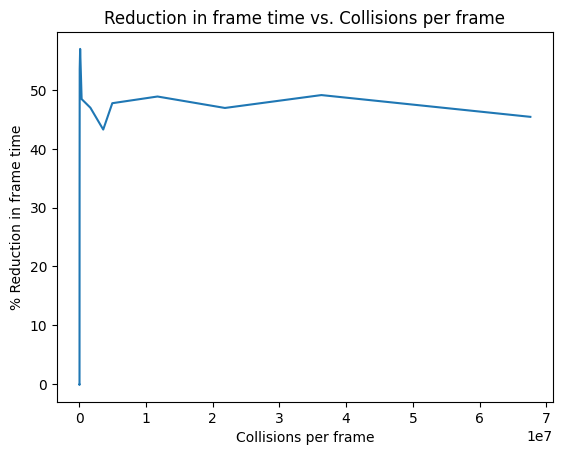

In [14]:
# Plot % difference
max_cpf = 1000000000 # for example


df_gpu_filtered = df_gpu[df_gpu["collisions_per_frame"] < max_cpf]
df_gpu_filtered_deduped = deduplicate_clusters(df_gpu_filtered, cluster_width=500)
df_gpu_filtered_deduped = df_gpu_filtered_deduped.sort_values('collisions_per_frame')
plt.figure()
plt.plot(df_gpu_filtered_deduped["collisions_per_frame"], df_gpu_filtered_deduped["pct_diff"], label="Gpu")
# plt.xscale('log')
plt.xlabel("Collisions per frame")
plt.ylabel("% Reduction in frame time")
plt.title("Reduction in frame time vs. Collisions per frame")
plt.show()



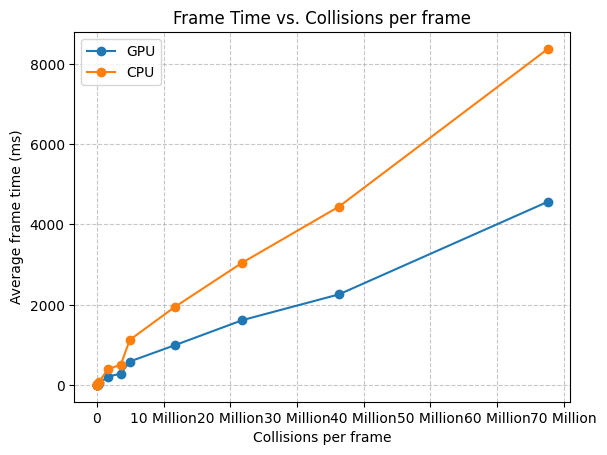

In [13]:
#Plot Frame Time comparison
df_gpu_deduped = deduplicate_clusters(df_gpu, cluster_width=1000)
df_cpu_deduped = deduplicate_clusters(df_cpu, cluster_width=1000)
max_cpf = 2000000000 
df_gpu_deduped = df_gpu_deduped[df_gpu_deduped["collisions_per_frame"] < max_cpf]
df_cpu_deduped = df_cpu_deduped[df_cpu_deduped["collisions_per_frame"] < max_cpf]
df_gpu_deduped = df_gpu_deduped.sort_values('collisions_per_frame')
df_cpu_deduped = df_cpu_deduped.sort_values('collisions_per_frame')


gpu_line = plt.plot(df_gpu_deduped["collisions_per_frame"], df_gpu_deduped["avg_frame_time"], label="GPU", marker='o')
cpu_line = plt.plot(df_cpu_deduped["collisions_per_frame"], df_cpu_deduped["avg_frame_time"], label="CPU", marker='o')

if max_cpf > 9000000:
    plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
else:
    plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlabel("Collisions per frame")
plt.ylabel("Average frame time (ms)")
plt.legend()
plt.title("Frame Time vs. Collisions per frame")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [15]:
# number of cross group combinations possible, order doesnt matter

group_1_unique_values = 4
group_2_unique_values = 4

def nCr(n, r):
    return int(np.math.factorial(n) / (np.math.factorial(r) * np.math.factorial(n-r)))

v = nCr(group_1_unique_values + group_2_unique_values, 2)
print(v)

28


C:\Users\sheld\AppData\Local\Temp\ipykernel_51908\2046139264.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return int(np.math.factorial(n) / (np.math.factorial(r) * np.math.factorial(n-r)))
